- Caricare e preprocessare il dataset MNIST.
- Costruire un modello sequenziale con strati densi.
- Compilare il modello specificando ottimizzatore, funzione di perdita e metriche.
- Addestrare il modello sui dati di addestramento.
- Valutare le prestazioni del modello sui dati di test.
- Utilizzare il modello per fare predizioni su nuove immagini.
- Data augmentation

In [374]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

tf.__version__

'2.18.0'

In [375]:
# Variabili principali
batch_size = 32
EPOCHS = 10
num_classes = 10

In [376]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

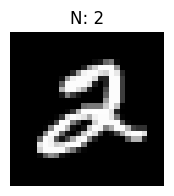

In [377]:
# Immagine generica con label
plt.figure(figsize=(2,2))
plt.imshow(X_train[5], cmap='gray')
plt.title(f'N: {y_train[5]}')
plt.axis(False)
plt.show()

In [378]:
# Normalizziamo i dati
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [379]:
np.max(X_train[0])

1.0

In [380]:
# def add_noise(x,y):
#     noise = tf.random.normal((img_width, img_height, img_channels))
#     noise = tf.clip_by_value(noise, clip_value_min=0.0, clip_value_max=noise_factor)
#     x = x + noise  # Aggiunge del rumore ai dati di training
#     x = tf.clip_by_value(x, clip_value_min=0.0, clip_value_max=1.0)
#     return x, y

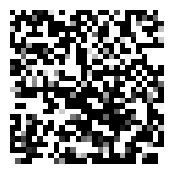

In [381]:
for x in X_train:
    noise = tf.random.normal((28,28))
    noise = tf.clip_by_value(noise, clip_value_min=0.0, clip_value_max=0.3)
    plt.figure(figsize=(2,2))
    plt.imshow(noise, cmap='gray')
    plt.axis(False)
    plt.show()
    break
    x

In [382]:
X_train.shape

(60000, 28, 28)

In [383]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [384]:
X_train.shape

(60000, 784)

In [385]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [386]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [387]:
# X_train = (tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size))
# y_test = (tf.data.Dataset.from_tensor_slices(y_test).batch(batch_size))

In [388]:
# X_train = X_train.shuffle(y_train)
# X_train = X_train.prefetch(tf.data.AUTOTUNE)

In [389]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [390]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'] )

In [391]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [392]:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=batch_size,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8224 - loss: 0.6882 - val_accuracy: 0.9592 - val_loss: 0.1597
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9473 - loss: 0.1812 - val_accuracy: 0.9703 - val_loss: 0.1130
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9659 - loss: 0.1203 - val_accuracy: 0.9712 - val_loss: 0.0993
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9729 - loss: 0.0912 - val_accuracy: 0.9760 - val_loss: 0.0857
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9798 - loss: 0.0703 - val_accuracy: 0.9768 - val_loss: 0.0782
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0531 - val_accuracy: 0.9787 - val_loss: 0.0725
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9810 - val_loss: 0.0672
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0346 - 

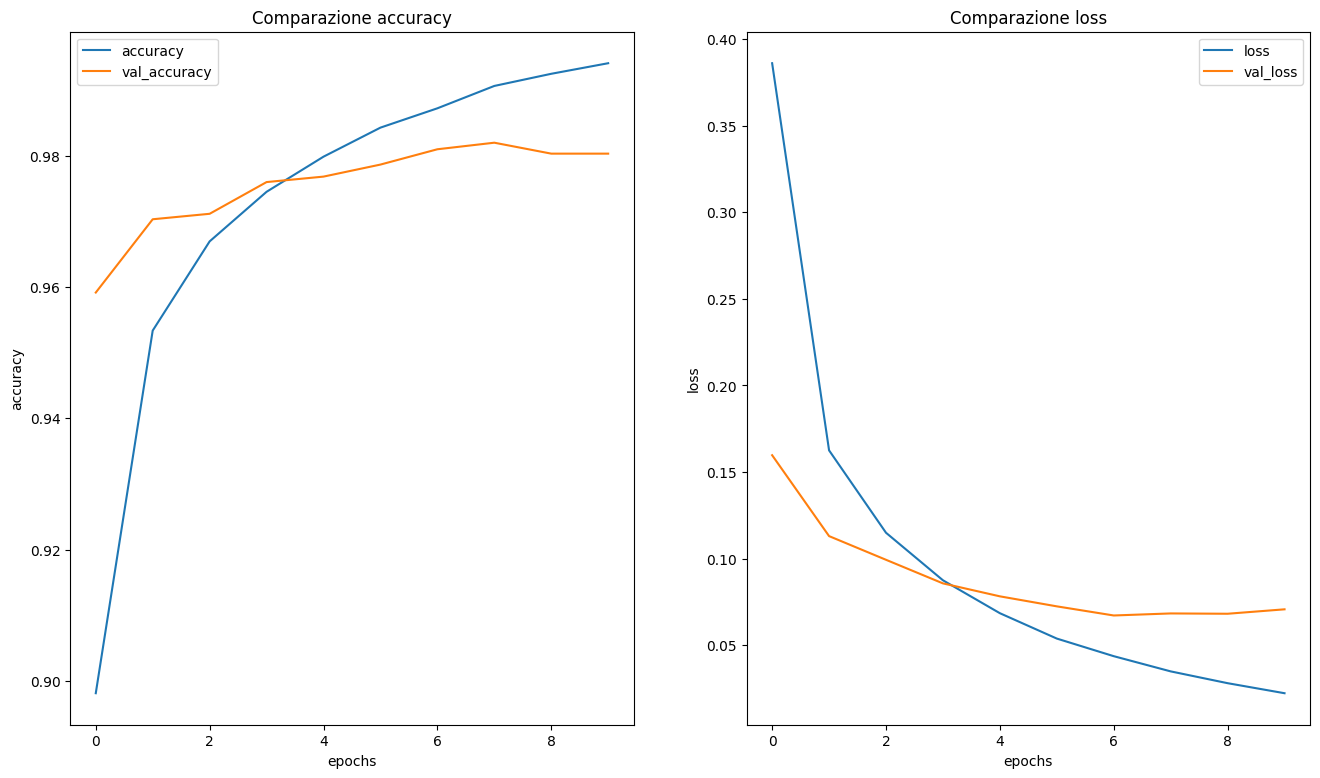

In [393]:
def plot_history(history):
    key = list(history.history.keys())
    plt.figure(1, figsize=(16,9))
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key[0]])
    plt.plot(history.history[key[2]])
    plt.title("Comparazione "+ str(key[0]))
    plt.legend([key[0], key[2]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[0]))

    # Creare la seconda figura
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key[1]])
    plt.plot(history.history[key[3]])
    plt.title("Comparazione "+ str(key[1]))
    plt.legend([key[1], key[3]])
    plt.xlabel("epochs")
    plt.ylabel(str(key[1]))

plot_history(history)

In [394]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perdita sul test set: {test_loss:.4f}')
print(f'Accuratezza sul test set: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9769 - loss: 0.0758
Perdita sul test set: 0.0667
Accuratezza sul test set: 0.9799


In [395]:
predictions = model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0], axis=0))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[1.192e-07 2.384e-07 5.555e-05 6.337e-04 0.000e+00 1.192e-07 0.000e+00
 9.990e-01 3.457e-06 9.954e-06]
7
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
